In [231]:
import enum
import os
import functools
import numpy as np
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random
import string

## Enums

In [63]:
class ImageCategory(enum.Enum):
    EASY = "easy"
    MEDIUM = "medium"
    HARD = "hard"


class ImageType(enum.Enum):
    GROUND_TRUTH = "ground_truth"
    OBSERVATION = "observation"

## Utilities

In [68]:
def show_image(image):
    plt.figure(figsize=(12, 8))
    plt.tick_params(labelbottom=False, labelleft=False)    
    plt.imshow(image, cmap='gray')


def save_image(image_data, image_id, image_type, image_category):
    path = os.path.join(
        "binary_images", f"{image_data.width}x{image_data.height}",
        image_category.value, f"image_{image_id}_{image_type.value}.png"
    )
    os.makedirs(os.path.dirname(path), exist_ok=True)
    image_data.save(path, format="PNG")

## Drawing

In [385]:
def draw_ellipse(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))
    width = random.randint(int(0.2 * max_width), max_width + 1)
    height = random.randint(int(0.2 * max_height), max_height + 1)
    ImageDraw.Draw(image).ellipse(
        xy=[(origin[0] - width/2, origin[1] - height/2),
            (origin[0] + width/2, origin[1] + height/2)],
        fill=color)


def draw_circle(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))
    max_size = min(max_width, max_height)
    size = random.randint(int(0.2 * max_size), max_size + 1)
    ImageDraw.Draw(image).ellipse(
        xy=[(origin[0] - size/2, origin[1] - size/2),
            (origin[0] + size/2, origin[1] + size/2)],
        fill=color)


def draw_rectangle(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))
    width = random.randint(int(0.2 * max_width), max_width + 1)
    height = random.randint(int(0.2 * max_height), max_height + 1)    
    ImageDraw.Draw(image).rectangle(
        xy=[(origin[0] - width/2, origin[1] - height/2),
            (origin[0] + width/2, origin[1] + height/2)],
        fill=color)


def draw_square(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))
    max_size = min(max_width, max_height)
    size = random.randint(int(0.2 * max_size), max_size + 1)
    ImageDraw.Draw(image).rectangle(
        xy=[(origin[0] - size/2, origin[1] - size/2),
            (origin[0] + size/2, origin[1] + size/2)],
        fill=color)


def draw_rounded_rectangle(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))
    width = random.randint(int(0.4 * max_width), max_width + 1)
    height = random.randint(int(0.4 * max_height), max_height + 1)
    radius = random.randint(
        int(min(width, height) / 4.0), int(min(width, height) / 2.0)
    )
    ImageDraw.Draw(image).rounded_rectangle(
        xy=[(origin[0] - width/2, origin[1] - height/2),
            (origin[0] + width/2, origin[1] + height/2)],
        fill=color,
        radius=radius)


def draw_line(image, max_width, max_height, color=255):
    origin = (random.randint(0, image.width), random.randint(0, image.height))  
    width = random.randint(int(0.1 * max_width), max_width + 1)
    height = random.randint(int(0.1 * max_height), max_height + 1)
    thickness = random.randint(1, int(0.02 * min(image.width, image.height)))
    start_x, end_x =  origin[0] - width/2, origin[0] + width/2
    if np.random.randint(2):
        start_x, end_x = end_x, start_x
    start_y, end_y = origin[1] - height/2, origin[1] + height/2
    if np.random.randint(2):
        start_y, end_y = end_y, start_y    
    ImageDraw.Draw(image).line(
        xy=[(start_x, start_y), (end_x, end_y)],
        width=thickness,
        fill=color)


def draw_triangle(image, max_width, max_height, color=255):
    width = random.randint(int(0.3 * max_width), max_width + 1)
    height = random.randint(int(0.3 * max_height), max_height + 1) 
    point1 = (
        random.randint(0, int(0.8 * image.width)),
        random.randint(0, int(0.8 * image.height)),
    )
    offset = (
        random.randint(int(0.4 * width), width),
        random.randint(int(0.4 * width), height),
    )
    point2 = (point1[0] + offset[0], point1[1] + offset[1])
    point3 = (point1[0] + width, point1[1] + height)
    ImageDraw.Draw(image).polygon([point1, point2, point3], fill=color)    


def draw_text(image, max_width, max_height, color=255):
    width = random.randint(int(0.3 * max_width), max_width + 1)
    font = PIL.ImageFont.load_default()
    text_length = random.randint(1, 4)
    text = "".join([random.choice(string.ascii_letters) for _ in range(text_length)])
    image_of_text = Image.new(mode='L', size=font.getsize(text))
    ImageDraw.Draw(image_of_text).text(xy=[(0, 0)], text=text, font=font, fill=color)
    height = min(int(image_of_text.height * (width / image_of_text.width)), max_height)
    image_of_text = image_of_text.resize(size=(width, height))
    text_array = np.array(image_of_text)
    text_array[text_array > 127.5] = 255
    text_array[text_array < 127.5] = 0
    image_of_text = PIL.Image.fromarray(text_array)
    left_corner = (
        random.randint(0, int(0.8 * image.width)),
        random.randint(0, int(0.8 * image.height)),
    )    
    image.paste(image_of_text, box=left_corner)

## Generating images

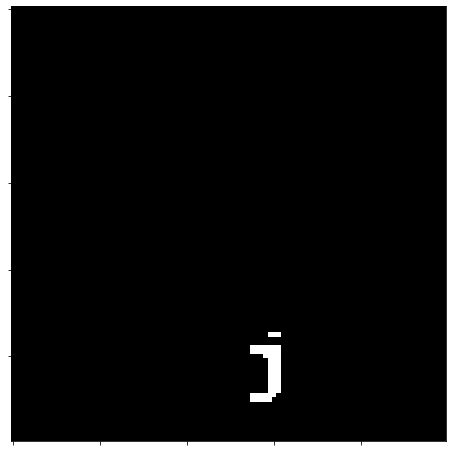

In [406]:
def generate_easy_image(size_of_image):
    image = Image.new(mode='L', size=size_of_image)

    return image
    

def generate_medium_image(size_of_image):
    image = Image.new(mode='L', size=size_of_image)

    return image


def generate_hard_image(size_of_image):
    image = Image.new(mode='L', size=size_of_image)

    return image
    

image = Image.new(mode='L', size=(100, 100))
# draw_rounded_rectangle(image, width=20, height=30)
#drawable_image.ellipse(xy=[(30, 30), (50, 70)], fill=255)
#drawable_image.polygon([(20,10), (10, 50), (40, 40)], fill=255)
#drawable_image.polygon([(80, 80), (80, 90), (90, 90), (90, 80)], fill=255)
#drawable_image.polygon([(60, 60), (60, 90), (70, 90), (70, 60)], fill=255)
#drawable_image.rounded_rectangle([(60, 10), (90, 20)], radius=5, fill=255)
#drawable_image.text([(10, 80)], text="abc", fill=255)
draw_text(image, max_width=30, max_height=30, color=255)
show_image(image)

## Generating noise

## Running developed generator